<a href="https://colab.research.google.com/github/xuxiufeng/Blockchain_Simulations/blob/main/Probability_Gamma_and_Weibull.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [237]:
from scipy.stats import weibull_min
import numpy as np
import matplotlib.pyplot as plt

In [238]:
np.random.seed(1)

In [239]:
def T_m(m, eta, delta, alpha, beta):
    sum_of_y = 0
    y = weibull_min.rvs(c=beta, scale=alpha) # shape = beta; scale=alpha
    sum_of_x = np.sum(np.random.gamma(eta, delta, m))
    while sum_of_x > y:
        sum_of_y = sum_of_y + y
        sum_of_x = np.sum(np.random.gamma(eta, delta, m))
        y = weibull_min.rvs(c=beta, scale=alpha)
    return(sum_of_y + sum_of_x)

In [240]:
def P_mt1(t, m, eta, delta, alpha, beta, N=80000): # 160000
    res = np.repeat(np.nan, N)
    Prob = np.repeat(np.nan, len(m))
    for i in range(len(m)):
        for j in range(N):
             res[j] = t < T_m(m[i], eta, delta, alpha, beta)
        Prob[i] = np.sum(res)/N
    return(Prob)

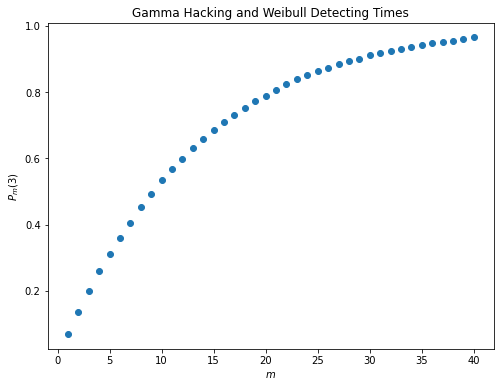

In [241]:
m = 40
eta = 0.02 #0.08
delta = 200 #4
alpha = 110 #3
beta = 150 #6
t_cross_section = 3
P_mt = P_mt1(t_cross_section, range(1, m+1), eta, delta, alpha, beta)
fig = plt.figure(figsize=(8, 6))
plt.scatter(range(1, m+1), P_mt)
plt.xlabel(r'$m$')
plt.ylabel(r'$P_m(3)$')
plt.title('Gamma Hacking and Weibull Detecting Times')
plt.show()

# 3D

In [242]:
def P_mt2(t, m, eta, delta, alpha, beta, N=30000): # N: iterations 30000
    res = np.repeat(np.nan, N)
    for j in range(N):
        res[j] = t < T_m(m, eta, delta, alpha, beta)
    Prob = np.sum(res)/N
    return (Prob)

In [243]:
m = 40
m = np.array(range(1, m+1))
t = np.array(np.linspace(0.1, 10, len(m)))
m_axis = np.repeat(np.nan, len(m)*len(t))
t_axis = np.repeat(np.nan, len(m)*len(t))
P_axis = np.repeat(np.nan, len(m)*len(t))
index = 0
for i in range(len(m)):
    for j in range(len(t)):
        m_axis[index] = m[i]
        t_axis[index] = t[j]
        P_axis[index] = P_mt2(t_axis[index], int(m_axis[index]), eta, delta, alpha, beta)
        index += 1
    print('Progress: {}%'.format((i+1)/len(m)*100))

Progress: 2.5%
Progress: 5.0%
Progress: 7.5%
Progress: 10.0%
Progress: 12.5%
Progress: 15.0%
Progress: 17.5%
Progress: 20.0%
Progress: 22.5%
Progress: 25.0%
Progress: 27.500000000000004%
Progress: 30.0%
Progress: 35.0%
Progress: 37.5%
Progress: 40.0%
Progress: 42.5%
Progress: 45.0%
Progress: 47.5%
Progress: 50.0%
Progress: 52.5%
Progress: 55.00000000000001%
Progress: 57.49999999999999%
Progress: 60.0%
Progress: 62.5%
Progress: 65.0%
Progress: 67.5%
Progress: 70.0%
Progress: 72.5%
Progress: 75.0%
Progress: 77.5%
Progress: 80.0%
Progress: 82.5%
Progress: 85.0%
Progress: 87.5%
Progress: 90.0%
Progress: 92.5%
Progress: 95.0%
Progress: 97.5%
Progress: 100.0%


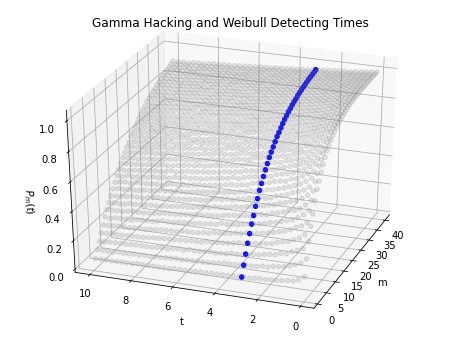

In [244]:
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
ax.scatter3D(m_axis, t_axis, P_axis, alpha=0.2, c='grey')
ax.scatter3D(m, np.repeat(t_cross_section, len(m)), P_mt, alpha=1, c='blue')
ax.view_init(30, 200)
ax.set_yticks(np.linspace(0, 10, 6))
ax.set_xlabel('m')
ax.set_ylabel('t')
ax.set_zlabel(r'$P_m(t)$')
ax.set_title('Gamma Hacking and Weibull Detecting Times')
plt.show()